<a href="https://colab.research.google.com/github/pooriaazami/deep_learning_class_notebooks/blob/main/horse_or_human_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data, validation_data, test_data = tfds.load('horses_or_humans', as_supervised=True, split=['train', 'test[:50%]', 'test[50%:]'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1027 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteF3M0ZF/horses_or_humans-train.tfrecord*..…

Generating test examples...:   0%|          | 0/256 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteF3M0ZF/horses_or_humans-test.tfrecord*...…

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


In [3]:
WIDTH = 300
HEIGHT = 300

HUMAN = 0
HORSE = 1

BATCH_SIZE = 32

def preprocess(img, label):
  return tf.image.resize(img, [WIDTH, HEIGHT]) / 255., label

In [4]:
train_data = train_data.shuffle(1024).map(preprocess).batch(BATCH_SIZE).prefetch(1)
validation_data = validation_data.shuffle(1024).map(preprocess).batch(BATCH_SIZE).prefetch(1)
test_data = test_data.shuffle(1024).map(preprocess).batch(BATCH_SIZE).prefetch(1)

In [5]:
model = keras.Sequential([
    layers.Input(shape=(WIDTH, HEIGHT, 3), name='input_layer'),

    layers.Conv2D(16, 3, activation='relu', padding='same', name='conv_1_1'),
    layers.Conv2D(16, 3, activation='relu', padding='same', name='conv_1_2'),
    layers.MaxPooling2D(4, name='max_pool_1'),
    layers.BatchNormalization(name='bn_1'),

    layers.Conv2D(32, 3, activation='relu', padding='same', name='conv_2_1'),
    layers.Conv2D(32, 3, activation='relu', padding='same', name='conv_2_2'),
    layers.MaxPooling2D(4, name='max_pool_2'),
    layers.BatchNormalization(name='bn_2'),

    layers.Conv2D(64, 3, activation='relu', padding='same', name='conv_3_1'),
    layers.Conv2D(64, 3, activation='relu', padding='same', name='conv_3_2'),
    layers.MaxPooling2D(4, name='max_pool_3'),
    layers.BatchNormalization(name='bn_3'),

    layers.Flatten(name='flatten'),

    layers.Dense(20, activation='relu', kernel_regularizer='l2', name='fc_1'),
    layers.Dense(20, activation='relu', kernel_regularizer='l2', name='fc_2'),

    layers.Dense(1, activation='sigmoid', name='output_layer')
], name='classifier')

In [6]:
model.summary()

Model: "classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1_1 (Conv2D)           (None, 300, 300, 16)      448       
                                                                 
 conv_1_2 (Conv2D)           (None, 300, 300, 16)      2320      
                                                                 
 max_pool_1 (MaxPooling2D)   (None, 75, 75, 16)        0         
                                                                 
 bn_1 (BatchNormalization)   (None, 75, 75, 16)        64        
                                                                 
 conv_2_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 conv_2_2 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pool_2 (MaxPooling2D)   (None, 18, 18, 32)        0

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model.fit(train_data, validation_data=validation_data, epochs=10)

Epoch 1/10
33/33 [==============================] - 22s 99ms/step - loss: 0.8115 - accuracy: 0.9046 - val_loss: 1.2226 - val_accuracy: 0.4922
Epoch 2/10
33/33 [==============================] - 2s 65ms/step - loss: 0.5128 - accuracy: 0.9971 - val_loss: 1.1557 - val_accuracy: 0.4922
Epoch 3/10
33/33 [==============================] - 2s 65ms/step - loss: 0.4009 - accuracy: 0.9990 - val_loss: 1.0733 - val_accuracy: 0.4922
Epoch 4/10
33/33 [==============================] - 2s 67ms/step - loss: 0.3130 - accuracy: 1.0000 - val_loss: 0.9100 - val_accuracy: 0.4922
Epoch 5/10
33/33 [==============================] - 2s 62ms/step - loss: 0.2482 - accuracy: 0.9990 - val_loss: 0.8853 - val_accuracy: 0.4922
Epoch 6/10
33/33 [==============================] - 2s 66ms/step - loss: 0.1929 - accuracy: 1.0000 - val_loss: 0.7451 - val_accuracy: 0.8359
Epoch 7/10
33/33 [==============================] - 2s 66ms/step - loss: 0.1522 - accuracy: 1.0000 - val_loss: 0.6640 - val_accuracy: 0.7031
Epoch 8/10
3

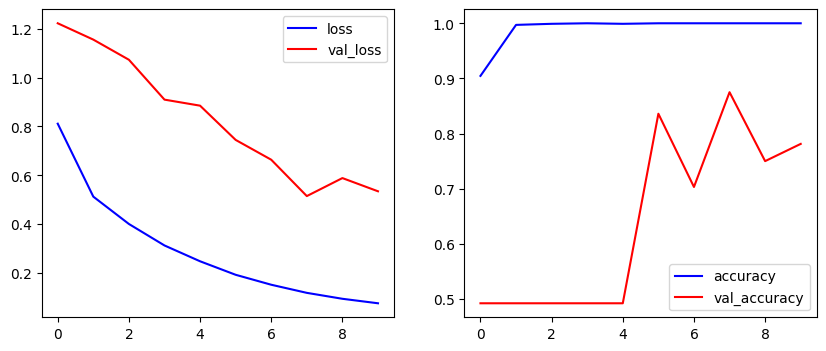

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(history.history['loss'], label='loss', color='blue')
axs[0].plot(history.history['val_loss'], label='val_loss', color='red')
axs[0].legend()

axs[1].plot(history.history['accuracy'], label='accuracy', color='blue')
axs[1].plot(history.history['val_accuracy'], label='val_accuracy', color='red')
axs[1].legend()

plt.show()